<a href="https://colab.research.google.com/github/Hubert246/Data-Science-Bootcamp/blob/main/08_sieci_neuronowe/03_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.11.0'

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

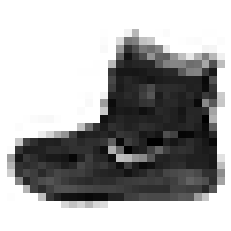

In [8]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

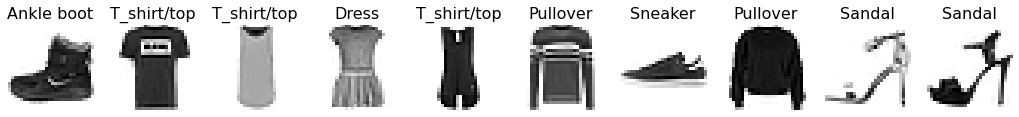

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5228 - accuracy: 0.8153 - val_loss: 0.4105 - val_accuracy: 0.8528
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3828 - accuracy: 0.8624 - val_loss: 0.4120 - val_accuracy: 0.8518
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3467 - accuracy: 0.8735 - val_loss: 0.3560 - val_accuracy: 0.8709
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3256 - accuracy: 0.8814 - val_loss: 0.3489 - val_accuracy: 0.8763
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.8876 - val_loss: 0.3618 - val_accuracy: 0.8766
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2988 - accuracy: 0.8928 - val_loss: 0.3661 - val_accuracy: 0.8795
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2903 - accuracy: 0.8953 - val_loss: 0.3590 - val_accuracy:

In [23]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.522761,0.815271,0.410502,0.852833,0
1,0.382763,0.862417,0.412024,0.851833,1
2,0.346731,0.873500,0.356007,0.870917,2
3,0.325574,0.881437,0.348884,0.876333,3
4,0.311771,0.887625,0.361800,0.876583,4
5,0.298802,0.892750,0.366148,0.879500,5
6,0.290327,0.895333,0.359014,0.881833,6
7,0.280320,0.900604,0.359382,0.881917,7
8,0.273718,0.902771,0.371901,0.881583,8
9,0.266920,0.905104,0.356963,0.882583,9


In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8801000118255615


In [27]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.000000580411, 0.000000000095, 0.000000002012, ..., 0.0014251987  , 0.000000186229, 0.9983148     ],
       [0.000000479022, 0.            , 0.9992577     , ..., 0.            , 0.000000000007, 0.            ],
       [0.000000000003, 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.00007058372 , 0.            , 0.000000174115, ..., 0.000000594568, 0.999919      , 0.000000000683],
       [0.            , 0.9999998     , 0.            , ..., 0.000000000102, 0.            , 0.000000001155],
       [0.0001307164  , 0.00008441963 , 0.00011753235 , ..., 0.0063084555  , 0.0007380545  , 0.00021969767 ]], dtype=float32)

In [28]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000001,0.000000,0.000000,0.000000,0.000000,0.000259,0.000000,0.001425,0.000000,0.998315
1,0.000000,0.000000,0.999258,0.000000,0.000525,0.000000,0.000217,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.040042,0.000000,0.000492,0.000003,0.000068,0.000000,0.959393,0.000000,0.000001,0.000000


In [30]:
#przeidywanie klas, zmienione od wersji 2.5
predictions_cls = np.argmax(predictions, axis=1) #najwieksza wartosc w wierszu
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])